In [17]:
%matplotlib inline
import keras
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import time

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

from sklearn.metrics import mean_squared_error

from scipy import optimize

(330, 3)
330
(265, 3)
595
(339, 3)
934
(353, 3)
1287
(367, 3)
1654
(574, 3)
2228
(430, 3)
2658
[[ 0.010997  0.        0.      ]
 [ 0.02008   0.        0.      ]
 [ 0.029922  1.        0.      ]
 ...
 [ 4.280133 -3.        6.      ]
 [ 4.290071 -3.        6.      ]
 [ 4.300049 -3.        6.      ]]
(2658, 3)


C:\Users\gouhe\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


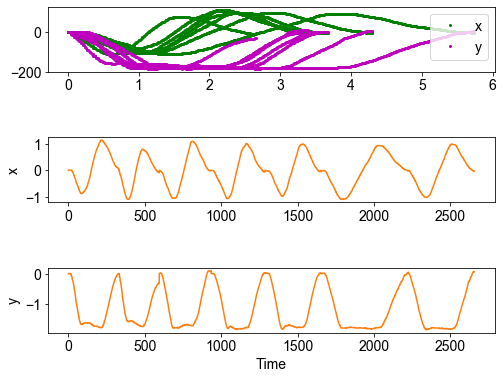

In [18]:
data_i = np.empty([0,3])
count_i = 0
for n in range(7):
    df = pd.read_csv('./InoueI/inouei_'+str(n)+'.csv', header=0, delimiter=',')
    print(df.shape)
    count_i += df.shape[0]
    print(count_i)
    data_i = np.vstack((data_i, df))
print(data_i)
print(data_i.shape)

data_i_x = data_i[:,1]/100
data_i_x = data_i_x.reshape(len(data_i_x), -1)
data_i_y = data_i[:,2]/100
data_i_y = data_i_y.reshape(len(data_i_y), -1)

# スケーリング
scaler = StandardScaler()
std_data_i_x = scaler.fit_transform(data_i_x)
std_data_i_y = scaler.fit_transform(data_i_y)


# draw
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(3, 1, figsize=(8,6), constrained_layout=True)
plt.subplots_adjust(hspace=1)

ax[0].plot(data_i[:,0], data_i[:,1], 'g.', markersize=4, label='x')
ax[0].plot(data_i[:,0], data_i[:,2], 'm.', markersize=4, label='y')
ax[0].legend()

ax[1].plot(np.arange(len(data_i_x)), data_i_x, '-', color='tab:orange')
ax[1].set_ylabel('x')

ax[2].plot(np.arange(len(data_i_y)), data_i_y, '-', color='tab:orange')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('y')

#plt.show()
plt.savefig('test.eps', bbox_inches="tight")
plt.savefig('test.png', bbox_inches="tight")


(296, 3)
296
(292, 3)
588
(292, 3)
880
(242, 3)
1122
(251, 3)
1373
(216, 3)
1589
(219, 3)
1808
(245, 3)
2053
(266, 3)
2319
(264, 3)
2583
(246, 3)
2829
(265, 3)
3094
(239, 3)
3333
(220, 3)
3553
(222, 3)
3775
(257, 3)
4032
(226, 3)
4258
(231, 3)
4489
(253, 3)
4742
(239, 3)
4981
[[ 0.009964  0.        0.      ]
 [ 0.019938  1.        1.      ]
 [ 0.029911  1.        1.      ]
 ...
 [ 2.370829 -6.       -2.      ]
 [ 2.380804 -7.       -1.      ]
 [ 2.390781 -7.       -1.      ]]
(4981, 3)


C:\Users\gouhe\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


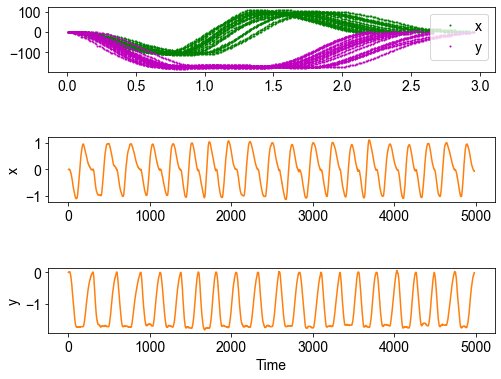

In [19]:
data_h = np.empty([0,3])
count_h = 0
for n in range(20):
    df = pd.read_csv('./InoueH/inoueH_'+str(n)+'.csv', header=0, delimiter=',')
    print(df.shape)
    count_h += df.shape[0]
    print(count_h)
    data_h = np.vstack((data_h, df))
print(data_h)
print(data_h.shape)

data_h_x = data_h[:,1]/100
data_h_x = data_h_x.reshape(len(data_h_x), -1)
data_h_y = data_h[:,2]/100
data_h_y = data_h_y.reshape(len(data_h_y), -1)

scaler = StandardScaler()
std_data_h_x = scaler.fit_transform(data_h_x)
std_data_h_y = scaler.fit_transform(data_h_y)


# draw
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(3, 1, figsize=(8,6), constrained_layout=True)
plt.subplots_adjust(hspace=1)
    
ax[0].plot(data_h[:,0], data_h[:,1], 'g.', markersize=2, label='x')
ax[0].plot(data_h[:,0], data_h[:,2], 'm.', markersize=2, label='y')
ax[0].legend()

ax[1].plot(np.arange(len(data_h_x)), data_h_x, '-', color='tab:orange')
ax[1].set_ylabel('x')

ax[2].plot(np.arange(len(data_h_y)), data_h_y, '-', color='tab:orange')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('y')

#plt.show()
plt.savefig('test.eps', bbox_inches="tight")
plt.savefig('test.png', bbox_inches="tight")


(7639, 1)
(7639, 1)


C:\Users\gouhe\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # This is added back by InteractiveShellApp.init_path()


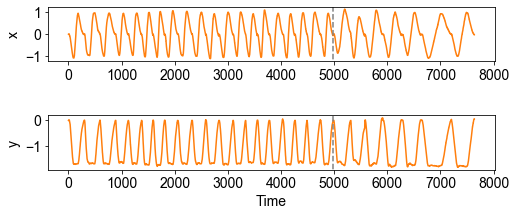

In [20]:
# 正規化せずに二人のデータを連結
data_x = np.concatenate((data_h_x, data_i_x))
data_y = np.concatenate((data_h_y, data_i_y))
print(data_x.shape)
print(data_y.shape)

# draw
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(2, 1, figsize=(8,3), constrained_layout=True)
plt.subplots_adjust(hspace=1)

ax[0].plot(np.arange(len(data_x)), data_x, '-', color='tab:orange')
ax[0].set_ylabel('x')
ax[0].axvline(x=count_h, ymin=-1, ymax=1, linestyle='--', color='gray')

ax[1].plot(np.arange(len(data_y)), data_y, linestyle='-', color='tab:orange')
ax[1].axvline(x=count_h, ymin=-2, ymax=1, linestyle='--', color='gray')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('y')

#plt.show()
plt.savefig('test.eps', bbox_inches="tight")
plt.savefig('test.png', bbox_inches="tight")

In [21]:
index_min = 0
index_max = count_h + count_i
lookback = 200
pred_len = 1

U = np.empty([index_max-index_min-lookback-pred_len,0], dtype=np.float)
D = np.empty([index_max-index_min-lookback-pred_len,0], dtype=np.float)

for i in range(lookback):
    data_x_tmp = data_x[index_min+i:index_max-pred_len-lookback+i].reshape(-1,1)
    data_y_tmp = data_y[index_min+i:index_max-pred_len-lookback+i].reshape(-1,1)
    U = np.concatenate([U, data_x_tmp, data_y_tmp], axis=1)

for j in range(pred_len):
    data_x_tmp = data_x[index_min+lookback+j:index_max-pred_len+j].reshape(-1,1)
    data_y_tmp = data_y[index_min+lookback+j:index_max-pred_len+j].reshape(-1,1)
    D = np.concatenate([D, data_x_tmp, data_y_tmp], axis=1)

print(U.shape)
print(D.shape)

U = np.reshape(U, (U.shape[0], 1, U.shape[1]))

len_train = 3333
len_val = count_h-3333
len_test = U.shape[0]-len_train-len_val

U_train = U[:len_train,:,:]
U_val = U[len_train:len_train+len_val,:,:]
U_test = U[len_train+len_val:len_train+len_val+len_test,:,:]
D_train = D[:len_train,:]
D_val = D[len_train:len_train+len_val,:]
D_test = D[len_train+len_val:len_train+len_val+len_test,:]

print(U_train.shape)
print(U_val.shape)
print(U_test.shape)
print(D_train.shape)
print(D_val.shape)
print(D_test.shape)



(7438, 400)
(7438, 2)
(3333, 1, 400)
(1648, 1, 400)
(2457, 1, 400)
(3333, 2)
(1648, 2)
(2457, 2)


Epoch 1/10
3333/3333 - 9s - loss: 0.0157 - val_loss: 0.0055
Epoch 2/10
3333/3333 - 8s - loss: 0.0061 - val_loss: 0.0067
Epoch 3/10
3333/3333 - 8s - loss: 0.0049 - val_loss: 0.0079
Epoch 4/10
3333/3333 - 8s - loss: 0.0043 - val_loss: 0.0040
Epoch 5/10
3333/3333 - 8s - loss: 0.0038 - val_loss: 0.0054
Epoch 6/10
3333/3333 - 8s - loss: 0.0036 - val_loss: 0.0029
Epoch 7/10
3333/3333 - 9s - loss: 0.0032 - val_loss: 0.0029
Epoch 8/10
3333/3333 - 9s - loss: 0.0032 - val_loss: 0.0046
Epoch 9/10
3333/3333 - 8s - loss: 0.0032 - val_loss: 0.0040
Epoch 10/10
3333/3333 - 8s - loss: 0.0030 - val_loss: 0.0034
84.27340078353882


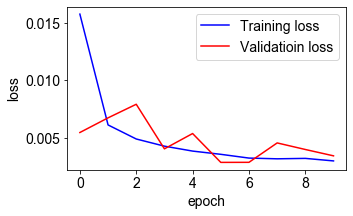

In [22]:
N = 20
model = Sequential()
model.add(layers.LSTM(N, activation='tanh', input_shape=(None,U_train.shape[-1])))
model.add(layers.Dense(D_train.shape[-1]))

model.compile(optimizer=RMSprop(), loss="mse")
time_start = time.time()

history = model.fit(U_train, D_train, epochs=10, batch_size=1, validation_data=(U_val, D_val), verbose=2)

time_end = time.time()
print(time_end-time_start)
    
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(loss))

# draw
plt.figure(figsize=(5,3))
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validatioin loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(fontsize=14)
plt.show()


C:\Users\gouhe\anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1648
0 8.069893921210186e-05
3 0.00020208966191576755
6 0.00047526343749874553
14 0.0005324980109762844
15 0.0007956761841601079
16 0.0011527727675466463
17 0.00164223904536783
18 0.0018028165493350786
19 0.002104771779075883
48 0.002198130897526485
49 0.003324081597170861
65 0.004762475020243301
67 0.006421743356425315
68 0.006501055283285777
106 0.006950245119921925
108 0.01004804565920368
110 0.016963736450894936
830 0.01868499685933969
1116 0.019254910392760536
1118 0.01959926970591884
1119 0.0216638325750837
1557 0.021728720779605998
1558 0.023079576198938828
1561 0.025467541136226835
1562 0.03013047298892879
1563 0.031105206319653866
1564 0.031491771079155684
1565 0.032208666785503055
1566 0.03221654492140375
1567 0.03301397857776012
1587 0.038497323716470355
1588 0.048011349247260776
1590 0.048395039130208026
Anomaly detection ratio= 0.18477818477818478
0.048395039130208026


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


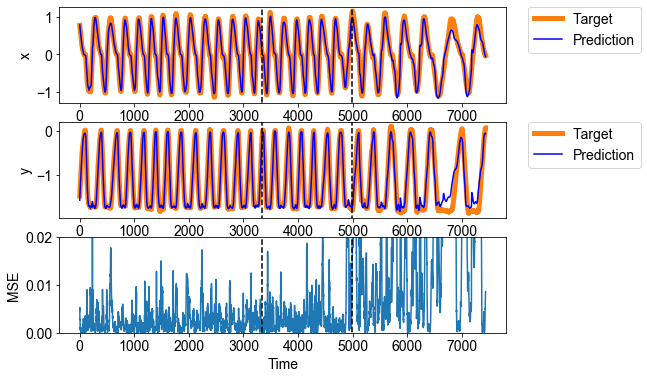

In [23]:
Y_train = model.predict(U_train)
Y_val = model.predict(U_val)
Y_test = model.predict(U_test)

Y = np.vstack((Y_train, Y_val))
Y = np.vstack((Y, Y_test))
#print(Y)

#error =  D_test - Y_test
#mean = np.mean(error, axis=0)
#print(mean)
#cov = np.cov(error, rowvar=False, bias=True)
#print(cov)


mse_all = []
rmse_all = []
mae_all = []
for i in range(D.shape[0]):
    mse = ((D[i,0] - Y[i,0])**2+(D[i,1]-Y[i,1])**2)/2
    mse_all.append(mse)
    rmse_all.append(np.sqrt(mse))
    mae_all.append(np.abs(D[i,0] - Y[i,0]))
    #if (D[i,0] - Y[i,0])**2+(D[i,1]-Y[i,1])**2 >= 0.1:
    #    print(i)

print(D_val.shape[0])
mse_val = []
rmse_val = []
mae_val = []
mse_val_max = 0.0
for i in range(D_val.shape[0]):
    mse = ((D_val[i,0] - Y_val[i,0])**2+(D_val[i,1]-Y_val[i,1])**2)/2
    mse_val.append(mse)
    rmse_val.append(np.sqrt(mse))
    mae_val.append(np.abs(D_val[i,0] - Y_val[i,0]))
    if mse > mse_val_max:
        mse_val_max = mse
        print(i, mse_val_max)

mse_test = []
rmse_test = []
mae_test = []
count_a = 0
for i in range(D_test.shape[0]):
    mse = ((D_test[i,0] - Y_test[i,0])**2+(D_test[i,1]-Y_test[i,1])**2)/2
    mse_test.append(mse)
    rmse_test.append(np.sqrt(mse))
    mae_test.append(np.abs(D_test[i,0] - Y_test[i,0]))
    if mse >= mse_val_max:
        count_a += 1
print('Anomaly detection ratio=', count_a/D_test.shape[0])
    
# draw
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(3, 1, figsize=(8,6), constrained_layout=True)
plt.subplots_adjust(hspace=0.2)

ax[0].plot(D[:,0], color='tab:orange', linewidth=5, label = 'Target')
ax[0].plot(Y[:,0], color='blue', label = 'Prediction')
ax[0].axvline(x=len_train, ymin=-1, ymax=1, linestyle='--', color='black')
ax[0].axvline(x=len_train+len_val, ymin=-1, ymax=1, linestyle='--', color='black')
ax[0].set_ylabel('x')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#ax[0].legend(loc='best')

print(mse_val_max)

ax[1].plot(D[:,1], color='tab:orange', linewidth=5, label = 'Target')
ax[1].plot(Y[:,1], color='blue', label = 'Prediction')
ax[1].axvline(x=len_train, ymin=-2, ymax=1, linestyle='--', color='black')
ax[1].axvline(x=len_train+len_val, ymin=-2, ymax=1, linestyle='--', color='black')
ax[1].set_ylabel('y')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#ax[1].legend(loc='best')

ax[2].plot(mse_all, '-')
#ax[3].plot(mae_all, label='MAE')
#ax[3].plot(rmse_all, label='RMSE')
ax[2].set_ylabel('MSE')
ax[2].set_ylim([0, 0.02])
ax[2].axvline(x=len_train, ymin=-2, ymax=1, linestyle='--', color='black')
ax[2].axvline(x=len_train+len_val, ymin=-2, ymax=1, linestyle='--', color='black')
#ax[2].axvline(x=3333+1390, ymin=-2, ymax=1, linestyle='--', color='tab:pink')
ax[2].axhline(y=mse_val_max, xmin=0, xmax=D.shape[0], linestyle='--', color='tab:red')
ax[2].set_xlabel('Time')

#plt.show()
plt.savefig('test.eps', bbox_inches="tight")
plt.savefig('test.png', bbox_inches="tight")


(330, 3)
330
(265, 3)
595
(339, 3)
934
(353, 3)
1287
(367, 3)
1654
(574, 3)
2228
(430, 3)
2658
[[ 0.010997  0.        0.      ]
 [ 0.02008   0.        0.      ]
 [ 0.029922  1.        0.      ]
 ...
 [ 4.280133 -3.        6.      ]
 [ 4.290071 -3.        6.      ]
 [ 4.300049 -3.        6.      ]]
(2658, 3)
(296, 3)
296
(292, 3)
588
(292, 3)
880
(242, 3)
1122
(251, 3)
1373
(216, 3)
1589
(219, 3)
1808
(245, 3)
2053
(266, 3)
2319
(264, 3)
2583
(246, 3)
2829
(265, 3)
3094
(239, 3)
3333
(220, 3)
3553
(222, 3)
3775
(257, 3)
4032
(226, 3)
4258
(231, 3)
4489
(253, 3)
4742
(239, 3)
4981
[[ 0.009964  0.        0.      ]
 [ 0.019938  1.        1.      ]
 [ 0.029911  1.        1.      ]
 ...
 [ 2.370829 -6.       -2.      ]
 [ 2.380804 -7.       -1.      ]
 [ 2.390781 -7.       -1.      ]]
(4981, 3)
(7639, 1)
(7639, 1)
(7538, 200)
(7538, 2)
(3333, 1, 200)
(1648, 1, 200)
(2557, 1, 200)
(3333, 2)
(1648, 2)
(2557, 2)
You must install pydot (`pip install pydot`) and install graphviz (see instructions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


80/80 [==============================] - 0s 3ms/step
0 0.011598394788607042
210 0.012790313286284626
931 0.012881184726553592
934 0.014407360681276297
936 0.015465286975942351
Anomaly detection ratio= 2.339e-01


C:\Users\gouhe\AppData\Local\Temp\ipykernel_23680\2507063280.py:213: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.2)


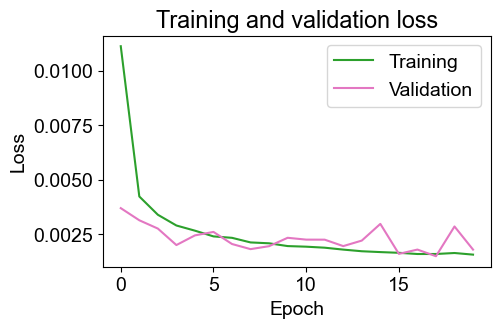

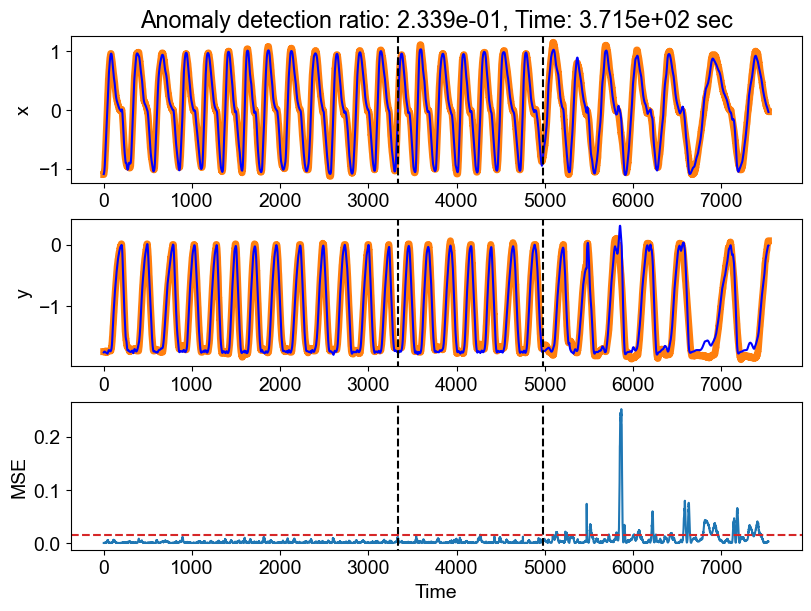

In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

########################################
# LSTM anomaly detection for handwritten data
# (c) Gouhei Tanaka
########################################

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import time

from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

from scipy import optimize

from tensorflow.keras.utils import plot_model

if __name__ == '__main__':

    # read data (InoueI)
    data_i = np.empty([0,3])
    count_i = 0
    for n in range(7):
        df = pd.read_csv('./InoueI/inouei_'+str(n)+'.csv', header=0, delimiter=',')
        print(df.shape)
        count_i += df.shape[0]
        print(count_i)
        data_i = np.vstack((data_i, df))
    print(data_i)
    print(data_i.shape)

    data_i_x = data_i[:,1]/100
    data_i_x = data_i_x.reshape(len(data_i_x), -1)
    data_i_y = data_i[:,2]/100
    data_i_y = data_i_y.reshape(len(data_i_y), -1)

    #scaler = StandardScaler()
    #std_data_i_x = scaler.fit_transform(data_i_x)
    #std_data_i_y = scaler.fit_transform(data_i_y)

    # read data (InoueH)
    data_h = np.empty([0,3])
    count_h = 0
    for n in range(20):
        df = pd.read_csv('./InoueH/inoueH_'+str(n)+'.csv', header=0, delimiter=',')
        print(df.shape)
        count_h += df.shape[0]
        print(count_h)
        data_h = np.vstack((data_h, df))
    print(data_h)
    print(data_h.shape)

    data_h_x = data_h[:,1]/100
    data_h_x = data_h_x.reshape(len(data_h_x), -1)
    data_h_y = data_h[:,2]/100
    data_h_y = data_h_y.reshape(len(data_h_y), -1)

    #scaler = StandardScaler()
    #std_data_h_x = scaler.fit_transform(data_h_x)
    #std_data_h_y = scaler.fit_transform(data_h_y)

    # concatenate two data without scaling
    data_x = np.concatenate((data_h_x, data_i_x))
    data_y = np.concatenate((data_h_y, data_i_y))
    print(data_x.shape)
    print(data_y.shape)

    # all data
    index_min = 0
    index_max = count_i +  count_h
    lookback = 100
    pred_len = 1

    U = np.empty([index_max-index_min-lookback-pred_len,0], dtype=float)
    D = np.empty([index_max-index_min-lookback-pred_len,0], dtype=float)

    for i in range(lookback):
        data_x_tmp = data_x[index_min+i:index_max-pred_len-lookback+i].reshape(-1,1)
        data_y_tmp = data_y[index_min+i:index_max-pred_len-lookback+i].reshape(-1,1)
        U = np.concatenate([U, data_x_tmp, data_y_tmp], axis=1)

    for j in range(pred_len):
        data_x_tmp = data_x[index_min+lookback+j:index_max-pred_len+j].reshape(-1,1)
        data_y_tmp = data_y[index_min+lookback+j:index_max-pred_len+j].reshape(-1,1)
        D = np.concatenate([D, data_x_tmp, data_y_tmp], axis=1)

    print(U.shape)
    print(D.shape)

    # data separation
    U = np.reshape(U, (U.shape[0], 1, U.shape[1]))

    len_train = 3333
    len_val = count_h-3333
    len_test = U.shape[0]-len_train-len_val

    U_train = U[:len_train,:,:]
    U_val = U[len_train:len_train+len_val,:,:]
    U_test = U[len_train+len_val:len_train+len_val+len_test,:,:]
    D_train = D[:len_train,:]
    D_val = D[len_train:len_train+len_val,:]
    D_test = D[len_train+len_val:len_train+len_val+len_test,:]

    print(U_train.shape)
    print(U_val.shape)
    print(U_test.shape)
    print(D_train.shape)
    print(D_val.shape)
    print(D_test.shape)

    # model
    model = Sequential()
    model.add(layers.LSTM(20, activation='tanh', input_shape=(None,U_train.shape[-1])))
    model.add(layers.Dense(D_train.shape[-1]))

    model.compile(optimizer=RMSprop(), loss='mse')
    #model.compile(optimizer=Adam(lr=learning_rate), loss='mse')
    
    plot_model(model, show_shapes=True, show_layer_names=False)
    
    time_start = time.time()

    #history = model.fit(U_train, D_train, epochs=50, batch_size=1, verbose=2)
    history = model.fit(U_train, D_train, epochs=20, batch_size=1, validation_data=(U_val, D_val), verbose=2)

    time_end = time.time()
    time_learning = time_end-time_start
    time_learning = '{0:.3e}'.format(time_learning)
    print(time_learning)
    
    # loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    
    plt.figure(figsize=(5,3))
    plt.plot(epochs, loss, 'tab:green', label='Training')
    plt.plot(epochs, val_loss, 'tab:pink', label="Validation")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title("Training and validation loss")
    plt.legend(fontsize=14)
    #plt.show()
    plt.savefig('test_loss.eps', bbox_inches="tight")
    plt.savefig('test_loss.png', bbox_inches="tight")

    # test error
    Y_train = model.predict(U_train)
    Y_val = model.predict(U_val)
    Y_test = model.predict(U_test)

    Y = np.vstack((Y_train, Y_val))
    Y = np.vstack((Y, Y_test))
    #print(Y)

    #error =  D_test - Y_test
    #mean = np.mean(error, axis=0)
    #print(mean)
    #cov = np.cov(error, rowvar=False, bias=True)
    #print(cov)

    mse_all = []
    rmse_all = []
    mae_all = []
    for i in range(D.shape[0]):
        mse = ((D[i,0] - Y[i,0])**2+(D[i,1]-Y[i,1])**2)/2
        mse_all.append(mse)
        rmse_all.append(np.sqrt(mse))
        mae_all.append(np.abs(D[i,0] - Y[i,0]))


    mse_val = []
    rmse_val = []
    mae_val = []
    mse_val_max = 0.0
    for i in range(D_val.shape[0]):
        mse = ((D_val[i,0] - Y_val[i,0])**2+(D_val[i,1]-Y_val[i,1])**2)/2
        mse_val.append(mse)
        rmse_val.append(np.sqrt(mse))
        mae_val.append(np.abs(D_val[i,0] - Y_val[i,0]))
        if mse > mse_val_max:
            mse_val_max = mse
            print(i, mse_val_max)

    mse_test = []
    rmse_test = []
    mae_test = []
    count_a = 0
    for i in range(D_test.shape[0]):
        mse = ((D_test[i,0] - Y_test[i,0])**2+(D_test[i,1]-Y_test[i,1])**2)/2
        mse_test.append(mse)
        rmse_test.append(np.sqrt(mse))
        mae_test.append(np.abs(D_test[i,0] - Y_test[i,0]))
        if mse >= mse_val_max:
            count_a += 1
    adr = count_a/D_test.shape[0]
    adr = '{0:.3e}'.format(adr)
    print('Anomaly detection ratio=', adr)
    
    # draw
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Arial'
    fig, ax = plt.subplots(3, 1, figsize=(8,6), constrained_layout=True)
    plt.subplots_adjust(hspace=0.2)

    ax[0].plot(D[:,0], color='tab:orange', linewidth=5, label = 'Target')
    ax[0].plot(Y[:,0], color='blue', label = 'Prediction')
    ax[0].axvline(x=len_train, ymin=-1, ymax=1, linestyle='--', color='black')
    ax[0].axvline(x=len_train+len_val, ymin=-1, ymax=1, linestyle='--', color='black')
    ax[0].set_ylabel('x')
    ax[0].set_title('Anomaly detection ratio: '+str(adr)+', Time: '+str(time_learning)+' sec')
    #ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    #ax[0].legend(loc='best')

    ax[1].plot(D[:,1], color='tab:orange', linewidth=5, label = 'Target')
    ax[1].plot(Y[:,1], color='blue', label = 'Prediction')
    ax[1].axvline(x=len_train, ymin=-2, ymax=1, linestyle='--', color='black')
    ax[1].axvline(x=len_train+len_val, ymin=-2, ymax=1, linestyle='--', color='black')
    ax[1].set_ylabel('y')
    #ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    #ax[1].legend(loc='best')

    ax[2].plot(mse_all, '-')
    #ax[2].plot(mae_all, label='MAE')
    #ax[2].plot(rmse_all, label='RMSE')
    ax[2].set_ylabel('MSE')
    #ax[2].set_ylim([0, 0.02])
    ax[2].axvline(x=len_train, ymin=-2, ymax=1, linestyle='--', color='black')
    ax[2].axvline(x=len_train+len_val, ymin=-2, ymax=1, linestyle='--', color='black')
    #ax[2].axvline(x=3333+1390, ymin=-2, ymax=1, linestyle='--', color='tab:pink')
    ax[2].axhline(y=mse_val_max, xmin=0, xmax=D.shape[0], linestyle='--', color='tab:red')
    ax[2].set_xlabel('Time')

    #plt.show()
    plt.savefig('test_ts.eps', bbox_inches="tight")
    plt.savefig('test_ts.png', bbox_inches="tight")
